Original data shape: (4259, 12)
Columns in dataset: Index(['region', 'year', 'mode', 'powertrain', 'Electricity demand',
       'EV charging points', 'EV sales', 'EV sales share', 'EV stock',
       'EV stock share', 'Oil displacement Mbd',
       'Oil displacement, million lge'],
      dtype='object')
First few rows:
       region  year  mode powertrain  Electricity demand  EV charging points  \
0  Australia  2011  Cars        BEV                 NaN                 NaN   
1  Australia  2011  Cars         EV                 NaN                 NaN   
2  Australia  2012  Cars        BEV                 NaN                 NaN   
3  Australia  2012  Cars         EV                 NaN                 NaN   
4  Australia  2012  Cars       PHEV                 NaN                 NaN   

   EV sales  EV sales share  EV stock  EV stock share  Oil displacement Mbd  \
0      49.0             NaN      49.0             NaN                   NaN   
1       NaN          0.0065       NaN         

E:\Anaconda\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Nie można odnaleźć określonego pliku
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "E:\Anaconda\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "E:\Anaconda\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anaconda\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "E:\Anaconda\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, arg

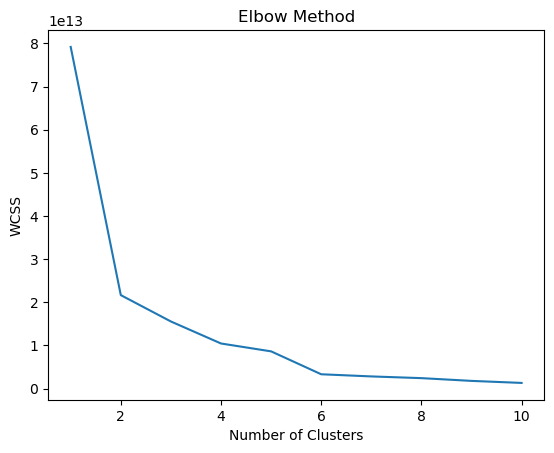


Distribution of clusters:
cluster
0    4254
2       3
1       2
Name: count, dtype: int64
Cluster analysis complete. Check 'EV_Data_with_clusters.csv'.


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel(r"C:\Users\zwier\anaconda_projects\6.7\chuj.xlsx")

# Debug: Check the data
print("Original data shape:", data.shape)
print("Columns in dataset:", data.columns)
print("First few rows:\n", data.head())

# Prepare data for clustering (using EV sales and EV charging points)
# Fill missing values with 0 to avoid dropping rows
X = data[['EV sales', 'EV charging points']].fillna(0)

# Debug: Check the shape of X
print("Shape of X for clustering:", X.shape)

# Elbow method to determine the number of clusters
wcss = []
# Test up to 10 clusters (adjust based on data size)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Save the elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

# Choose 3 clusters (adjust based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Analyze the distribution of clusters
cluster_counts = data['cluster'].value_counts()
print("\nDistribution of clusters:")
print(cluster_counts)

# Save the data with clusters to CSV
data.to_csv('EV_Data_with_clusters.csv', index=False)
print("Cluster analysis complete. Check 'EV_Data_with_clusters.csv'.")

Original data shape: (4259, 12)
Columns in dataset: Index(['region', 'year', 'mode', 'powertrain', 'Electricity demand',
       'EV charging points', 'EV sales', 'EV sales share', 'EV stock',
       'EV stock share', 'Oil displacement Mbd',
       'Oil displacement, million lge'],
      dtype='object')
First few rows:
       region  year  mode powertrain  Electricity demand  EV charging points  \
0  Australia  2011  Cars        BEV                 NaN                 NaN   
1  Australia  2011  Cars         EV                 NaN                 NaN   
2  Australia  2012  Cars        BEV                 NaN                 NaN   
3  Australia  2012  Cars         EV                 NaN                 NaN   
4  Australia  2012  Cars       PHEV                 NaN                 NaN   

   EV sales  EV sales share  EV stock  EV stock share  Oil displacement Mbd  \
0      49.0             NaN      49.0             NaN                   NaN   
1       NaN          0.0065       NaN         

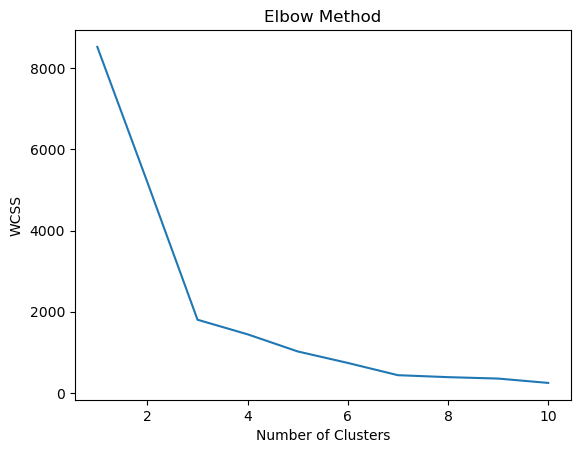


Distribution of clusters:
cluster
0    4250
1       5
2       4
Name: count, dtype: int64
Cluster analysis complete. Check 'EV_Data_with_clusters.csv'.


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel(r"C:\Users\zwier\anaconda_projects\6.7\chuj.xlsx")

# Debug: Check the data
print("Original data shape:", data.shape)
print("Columns in dataset:", data.columns)
print("First few rows:\n", data.head())

# Prepare data for clustering (using EV sales and EV charging points)
X = data[['EV sales', 'EV charging points']].copy()

# Handle missing values (fill with 0 for now, but we can adjust later)
X = X.fillna(0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Debug: Check the shape of scaled data
print("Shape of X_scaled for clustering:", X_scaled.shape)

# Elbow method to determine the number of clusters
wcss = []
# Test up to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Save the elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

# Choose the number of clusters based on the elbow plot (start with 3)
n_clusters = 3  # Adjust this after checking the elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the distribution of clusters
cluster_counts = data['cluster'].value_counts()
print("\nDistribution of clusters:")
print(cluster_counts)

# Save the data with clusters to CSV
data.to_csv('EV_Data_with_clusters.csv', index=False)
print("Cluster analysis complete. Check 'EV_Data_with_clusters.csv'.")

Original data shape: (4259, 12)
Columns in dataset: Index(['region', 'year', 'mode', 'powertrain', 'Electricity demand',
       'EV charging points', 'EV sales', 'EV sales share', 'EV stock',
       'EV stock share', 'Oil displacement Mbd',
       'Oil displacement, million lge'],
      dtype='object')
First few rows:
       region  year  mode powertrain  Electricity demand  EV charging points  \
0  Australia  2011  Cars        BEV                 NaN                 NaN   
1  Australia  2011  Cars         EV                 NaN                 NaN   
2  Australia  2012  Cars        BEV                 NaN                 NaN   
3  Australia  2012  Cars         EV                 NaN                 NaN   
4  Australia  2012  Cars       PHEV                 NaN                 NaN   

   EV sales  EV sales share  EV stock  EV stock share  Oil displacement Mbd  \
0      49.0             NaN      49.0             NaN                   NaN   
1       NaN          0.0065       NaN         

E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MK

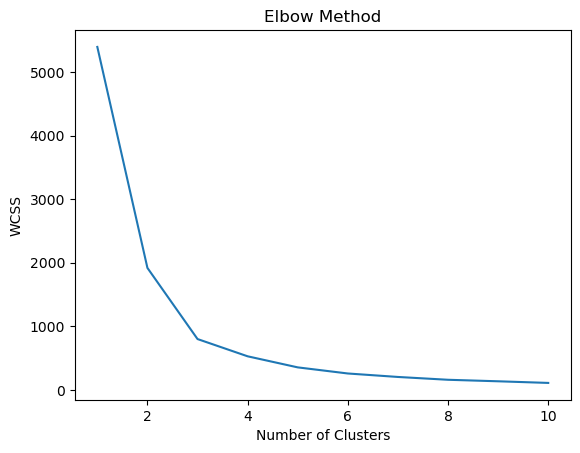


Distribution of clusters:
cluster
2    1090
0    1048
1     561
Name: count, dtype: int64
Cluster analysis complete. Check 'EV_Data_with_clusters.csv'.


E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel(r"C:\Users\zwier\anaconda_projects\6.7\chuj.xlsx")

# Debug: Check the data
print("Original data shape:", data.shape)
print("Columns in dataset:", data.columns)
print("First few rows:\n", data.head())

# Prepare data for clustering (using EV sales and EV charging points)
X = data[['EV sales', 'EV charging points']].copy()

# Fill NaN with 0 temporarily to filter out rows with both zeros
X = X.fillna(0)

# Remove rows where both EV sales and EV charging points are 0
X = X[(X['EV sales'] > 0) | (X['EV charging points'] > 0)]
print("Shape after removing rows with both zeros:", X.shape)

# Keep the corresponding rows in the original data
data_filtered = data.loc[X.index].copy()

# Log-transform the data to handle extreme values (add 1 to avoid log(0))
X['EV sales'] = np.log1p(X['EV sales'])
X['EV charging points'] = np.log1p(X['EV charging points'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Debug: Check the shape of scaled data
print("Shape of X_scaled for clustering:", X_scaled.shape)

# Elbow method to determine the number of clusters
wcss = []
# Test up to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Save the elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

# Choose the number of clusters based on the elbow plot (start with 3)
n_clusters = 3  # Adjust this after checking the elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_filtered['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the distribution of clusters
cluster_counts = data_filtered['cluster'].value_counts()
print("\nDistribution of clusters:")
print(cluster_counts)

# Save the data with clusters to CSV
data_filtered.to_csv('EV_Data_with_clusters.csv', index=False)
print("Cluster analysis complete. Check 'EV_Data_with_clusters.csv'.")

Original data shape: (4259, 12)
Columns in dataset: Index(['region', 'year', 'mode', 'powertrain', 'Electricity demand',
       'EV charging points', 'EV sales', 'EV sales share', 'EV stock',
       'EV stock share', 'Oil displacement Mbd',
       'Oil displacement, million lge'],
      dtype='object')
First few rows:
       region  year  mode powertrain  Electricity demand  EV charging points  \
0  Australia  2011  Cars        BEV                 NaN                 NaN   
1  Australia  2011  Cars         EV                 NaN                 NaN   
2  Australia  2012  Cars        BEV                 NaN                 NaN   
3  Australia  2012  Cars         EV                 NaN                 NaN   
4  Australia  2012  Cars       PHEV                 NaN                 NaN   

   EV sales  EV sales share  EV stock  EV stock share  Oil displacement Mbd  \
0      49.0             NaN      49.0             NaN                   NaN   
1       NaN          0.0065       NaN         

E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MK

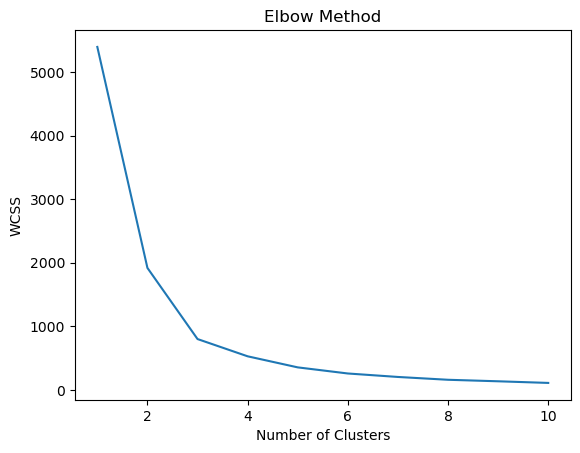


Distribution of clusters:
cluster
2    1090
0    1048
1     561
Name: count, dtype: int64
Cluster analysis complete. Check 'EV_Data_with_clusters2.csv'.


E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel(r"C:\Users\zwier\anaconda_projects\6.7\chuj.xlsx")

# Debug: Check the data
print("Original data shape:", data.shape)
print("Columns in dataset:", data.columns)
print("First few rows:\n", data.head())

# Prepare data for clustering (using EV sales and EV charging points)
X = data[['EV sales', 'EV charging points']].copy()

# Fill NaN with 0 temporarily to filter out rows with both zeros
X = X.fillna(0)

# Remove rows where both EV sales and EV charging points are 0
X = X[(X['EV sales'] > 0) | (X['EV charging points'] > 0)]
print("Shape after removing rows with both zeros:", X.shape)

# Keep the corresponding rows in the original data
data_filtered = data.loc[X.index].copy()

# Log-transform the data to handle extreme values (add 1 to avoid log(0))
X['EV sales'] = np.log1p(X['EV sales'])
X['EV charging points'] = np.log1p(X['EV charging points'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Debug: Check the shape of scaled data
print("Shape of X_scaled for clustering:", X_scaled.shape)

# Elbow method to determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Save the elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

# Choose the number of clusters (3 clusters)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_filtered['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the distribution of clusters
cluster_counts = data_filtered['cluster'].value_counts()
print("\nDistribution of clusters:")
print(cluster_counts)

# Save the data with clusters to CSV
data_filtered.to_csv('EV_Data_with_clusters2.csv', index=False)
print("Cluster analysis complete. Check 'EV_Data_with_clusters2.csv'.")

Original data shape: (4259, 12)
Columns in dataset: Index(['region', 'year', 'mode', 'powertrain', 'Electricity demand',
       'EV charging points', 'EV sales', 'EV sales share', 'EV stock',
       'EV stock share', 'Oil displacement Mbd',
       'Oil displacement, million lge'],
      dtype='object')
First few rows:
       region  year  mode powertrain  Electricity demand  EV charging points  \
0  Australia  2011  Cars        BEV                 NaN                 NaN   
1  Australia  2011  Cars         EV                 NaN                 NaN   
2  Australia  2012  Cars        BEV                 NaN                 NaN   
3  Australia  2012  Cars         EV                 NaN                 NaN   
4  Australia  2012  Cars       PHEV                 NaN                 NaN   

   EV sales  EV sales share  EV stock  EV stock share  Oil displacement Mbd  \
0      49.0             NaN      49.0             NaN                   NaN   
1       NaN          0.0065       NaN         

E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MK

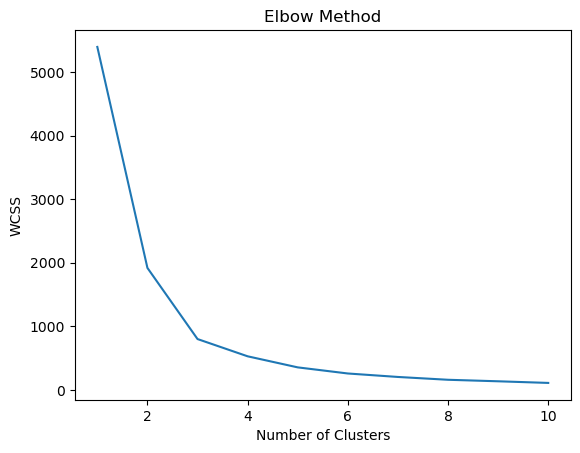


Distribution of clusters:
cluster
3    1090
1    1048
2     561
Name: count, dtype: int64
Cluster analysis complete. Check 'EV_Data_with_clusters3.csv'.


E:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel(r"C:\Users\zwier\anaconda_projects\6.7\chuj.xlsx")

# Debug: Check the data
print("Original data shape:", data.shape)
print("Columns in dataset:", data.columns)
print("First few rows:\n", data.head())

# Prepare data for clustering (using EV sales and EV charging points)
X = data[['EV sales', 'EV charging points']].copy()

# Fill NaN with 0 temporarily to filter out rows with both zeros
X = X.fillna(0)

# Remove rows where both EV sales and EV charging points are 0
X = X[(X['EV sales'] > 0) | (X['EV charging points'] > 0)]
print("Shape after removing rows with both zeros:", X.shape)

# Keep the corresponding rows in the original data
data_filtered = data.loc[X.index].copy()

# Log-transform the data to handle extreme values (add 1 to avoid log(0))
X['EV sales'] = np.log1p(X['EV sales'])
X['EV charging points'] = np.log1p(X['EV charging points'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Debug: Check the shape of scaled data
print("Shape of X_scaled for clustering:", X_scaled.shape)

# Elbow method to determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Save the elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

# Choose the number of clusters (3 clusters)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_filtered['cluster'] = kmeans.fit_predict(X_scaled) + 1  # Dodajemy 1, żeby przesunąć wartości na 1, 2, 3

# Analyze the distribution of clusters
cluster_counts = data_filtered['cluster'].value_counts()
print("\nDistribution of clusters:")
print(cluster_counts)

# Save the data with clusters to CSV
data_filtered.to_csv('EV_Data_with_clusters3.csv', index=False)
print("Cluster analysis complete. Check 'EV_Data_with_clusters3.csv'.")